<a href="https://colab.research.google.com/github/Utkarshmishra2k2/Covid-Sentiment-Analysis/blob/main/Covid_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
!pip install catboost
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *

In [ ]:
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# Data Loading & Preprocessing

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/UM1412/Data-Set/main/CoronavirusTweets.csv',sep=',',encoding='latin')

In [ ]:
df.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
32325,36124,81076,NaN,07/04/20,I REALLY want a streaming video (or music) pro...,Positive
12032,15831,60783,LA,20/03/20,"In Italy, they only allow 30 people in the gro...",Positive
20474,24273,69225,United States,25/03/20,"? delivery, ship, or parking lot pickup! ?. \r...",Positive
14774,18573,63525,???NN??.....?N???,22/03/20,Together AgainstCorona The Government of India...,Neutral
34900,38699,83651,"Kampala, Uganda",08/04/20,"After COVID 19,\r\r\nAre we expecting economic...",Extremely Negative
14993,18792,63744,NaN,22/03/20,Enough people are not taking this seriously. M...,Positive
12986,16785,61737,LA/NY/SF,21/03/20,Strong thread on changing consumer behavior in...,Positive
9151,12950,57902,"Rio de Janeiro, Brazil",20/03/20,After the massive economic damage caused by 19...,Negative
23943,27742,72694,NaN,26/03/20,"Save toilet paper. How to use Lota, complete g...",Positive
1245,5044,49996,"Washington, DC",17/03/20,proud to say @rebecca_mehra inspired me. I not...,Extremely Positive


In [ ]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserName,41157.0,24377.0,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,69329.0,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


# Exploratory Data Analysis

In [ ]:
a=[]
b=[]
for col in df.columns:
  a.append(df[col].nunique())
  b.append(col)

In [ ]:
d = pd.DataFrame(a,b,columns=['counts'])

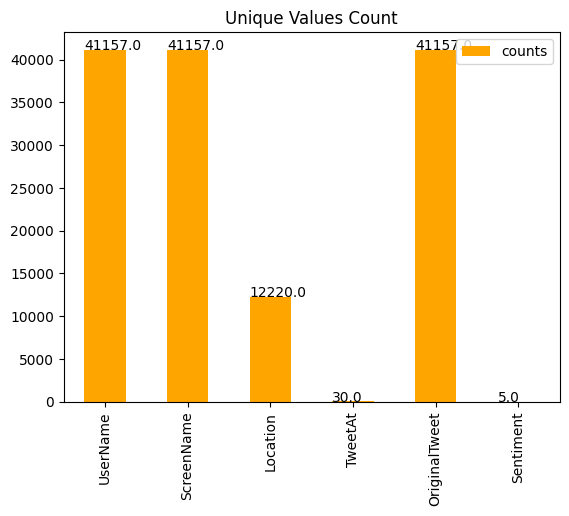

In [ ]:
n=d.plot(kind='bar',color='orange')
plt.title("Unique Values Count")
for p in n.patches:
  n.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

In [ ]:
# Sentiment count
df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

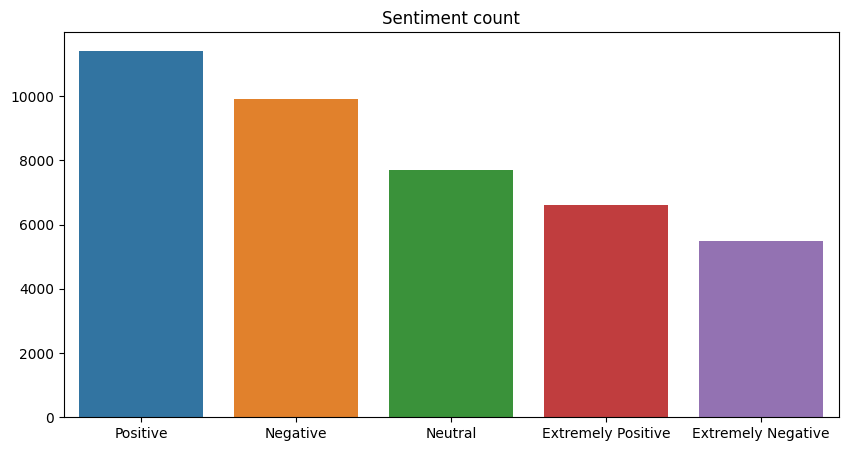

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment count")
plt.show()

In [ ]:
df[df['Sentiment']=='Positive'].loc[3,'OriginalTweet']

"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j"

In [ ]:
df[df['Sentiment']=="Extremely Positive"].loc[11,"OriginalTweet"]

'Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.'

In [ ]:
df[df['Sentiment']=="Neutral"].loc[10,"OriginalTweet"]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9"

In [ ]:
df[df['Sentiment']=="Neutral"].loc[16,"OriginalTweet"]

'????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??\r\r\n#???_???????? ????? ??? ???? ? https://t.co/51bL8P6vZh'

In [ ]:
df[df['Sentiment']=="Extremely Negative"].loc[27,"OriginalTweet"]

'This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out about my possible exposure to the virus.  Stay home people and be pragmatic. I will keep you updated on how IÂ\x92m doing ???? No panic. https://t.co/Lg7HVMZglZ'

In [ ]:
df[df['Sentiment']=="Extremely Negative"].loc[41130,"OriginalTweet"]

'Squeo works in the meat department of a Kroger supermarket in Michigan. He knows of several grocery workers whoÂ\x92ve tested positive for COVID-19 and one in his area who died. He worries that the behavior of some shoppers is putting people in unnecessary danger.'

In [ ]:
df[df['Sentiment']=="Negative"].loc[9,"OriginalTweet"]

"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona"

In [ ]:
df['Sentiment_cat'] = df['Sentiment'].replace({"Positive":3,'Negative':1,'Neutral':2,'Extremely Positive':3,'Extremely Negative':1})

In [ ]:
df.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_cat
22952,26751,71703,Sri Lanka,25/03/20,A program of delivery amp sale of essential co...,Positive,3
21991,25790,70742,"Massachusetts, USA",25/03/20,"Well damn, I like Market Basket and Shaws that...",Negative,1
4202,8001,52953,"Washington, DC",18/03/20,"Finally, Consumer Unit Supervising Attorney Je...",Extremely Negative,1
32156,35955,80907,Internet,07/04/20,Update #2 : Dear Citizens: The #coffeefilter #...,Positive,3
31845,35644,80596,"Manhattan, NY",07/04/20,Residential property prices could plummet 30 p...,Neutral,2
27794,31593,76545,Northern California,03/04/20,ÂDemand for online groceries has surged durin...,Extremely Positive,3
39657,43456,88408,"Ontario, Canada",13/04/20,19 - 25 year old self - waited in line in ques...,Positive,3
13755,17554,62506,NaN,21/03/20,"Karma,a nurse too weak to treat a panic buyer ...",Extremely Negative,1
35234,39033,83985,"New Delhi, India",08/04/20,How Covid-19 lockdown has impacted fuel prices...,Neutral,2
4510,8309,53261,"Bhubaneswar, Odisha",18/03/20,I have registered my sisterÂs details in the ...,Extremely Positive,3


In [ ]:
df.Sentiment_cat.unique()

array([2, 3, 1])

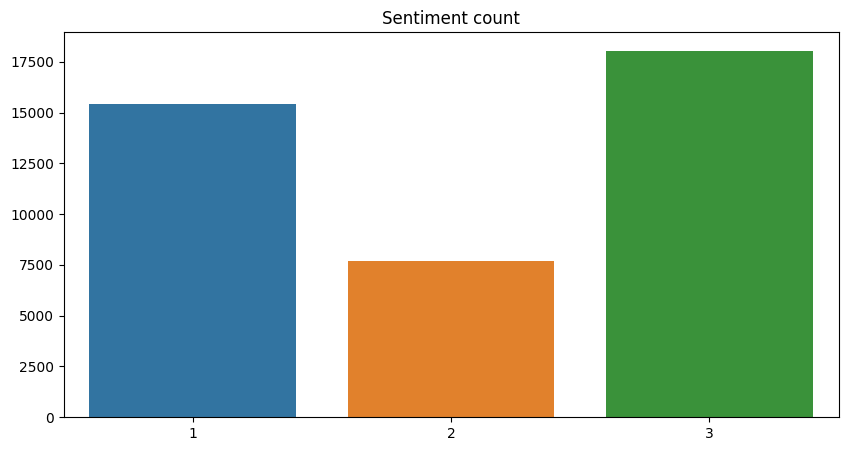

In [ ]:
Sentiment_cat = df['Sentiment_cat'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=Sentiment_cat.index, y=Sentiment_cat.values)
plt.title("Sentiment count")
plt.show()

In [ ]:
df.TweetAt.value_counts()

20/03/20    3448
19/03/20    3215
25/03/20    2979
18/03/20    2742
21/03/20    2653
22/03/20    2114
23/03/20    2062
17/03/20    1977
08/04/20    1881
07/04/20    1843
06/04/20    1742
24/03/20    1480
09/04/20    1471
13/04/20    1428
26/03/20    1277
05/04/20    1131
10/04/20    1005
02/04/20     954
11/04/20     909
03/04/20     810
12/04/20     803
04/04/20     767
16/03/20     656
01/04/20     630
27/03/20     345
31/03/20     316
14/04/20     284
29/03/20     125
30/03/20      87
28/03/20      23
Name: TweetAt, dtype: int64

In [ ]:
df['TweetAt'] = pd.to_datetime(df['TweetAt'], format="%d/%m/%y")

In [ ]:
df['TweetAt'] = df['TweetAt'].dt.date.astype(str)

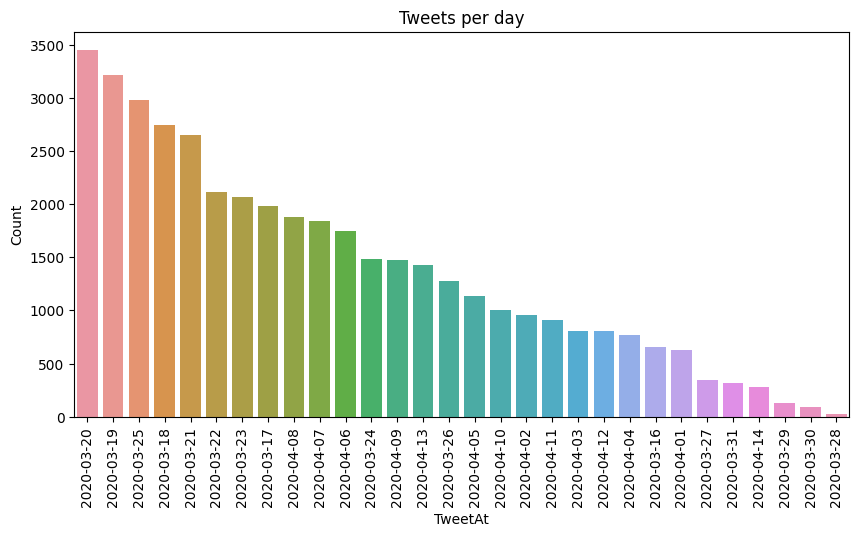

In [ ]:
TweetAt_counts = df['TweetAt'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=TweetAt_counts.index, y=TweetAt_counts.values)
plt.xticks(rotation = 90)
plt.title("Tweets per day")
plt.ylabel("Count")
plt.xlabel("TweetAt")
plt.show()

In [ ]:
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

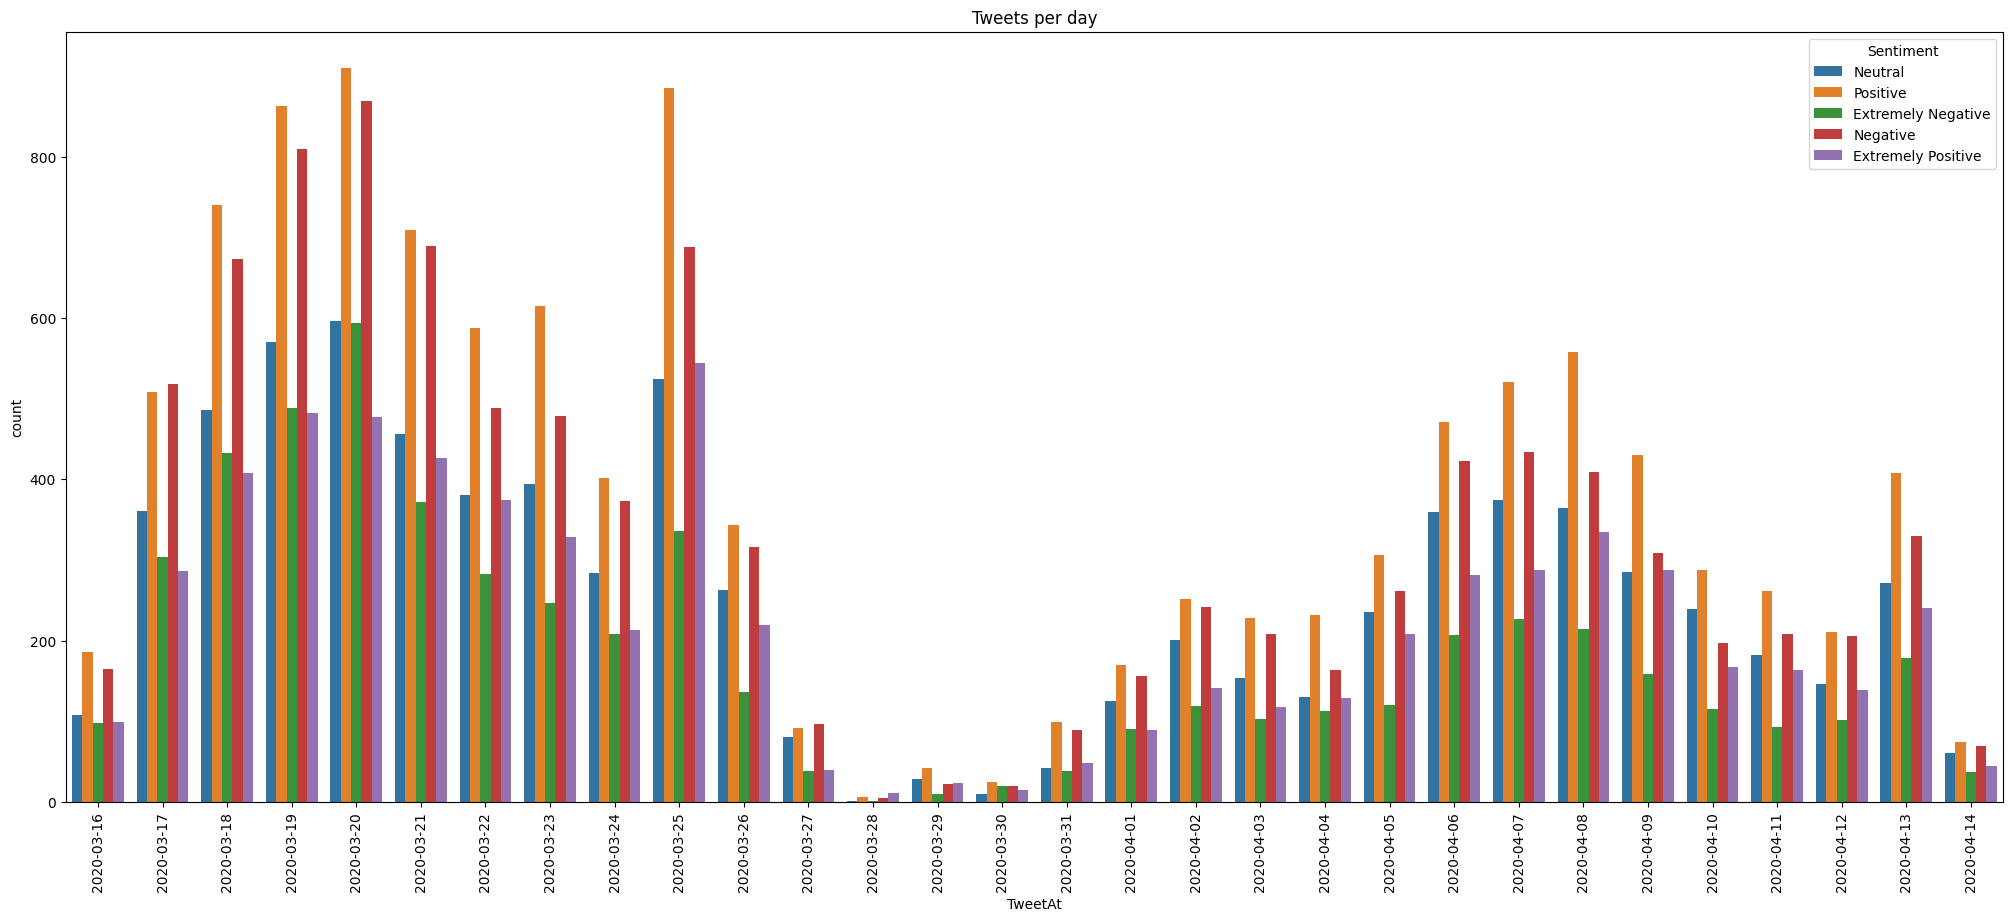

In [ ]:
plt.figure(figsize=(25, 10))
sns.countplot(x=df['TweetAt'], hue=df['Sentiment'])
plt.title('Tweets per day')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Locations
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [ ]:
# lets find out top 10 locations
top_loc_df = pd.DataFrame(df.Location.value_counts().sample(10))

In [ ]:
top_loc_df.reset_index(inplace=True)
top_loc_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)

In [ ]:
top_loc_df

,Location,Location_Count
0,Cape Town & London,1
1,"Carlsbad, CA",5
2,God's Green Earth,1
3,I fly FedEx Cargo,1
4,Milwaukee,3
5,"Downing Street, Westminster",1
6,LuxuryCondosWitElavatorsInThem,1
7,Madrid,3
8,Republic of South Yorkshire.,1
9,"Phoenix, AZ Hermosillo, Sonora",1


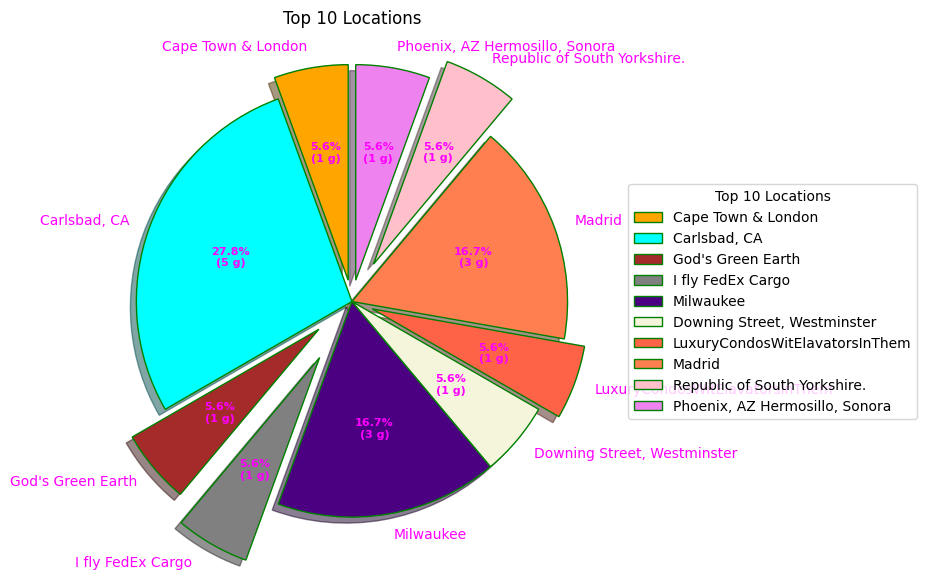

In [ ]:
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0,0.1,0.0,0.2,0.1)
# Creating color parameters
colors = ( "orange", "cyan", "brown",
        "grey", "indigo", "beige", "tomato","coral", "pink","violet")
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(top_loc_df['Location_Count'],
                                autopct = lambda pct: func(pct, top_loc_df['Location_Count']),
                                explode = explode,
                                labels = top_loc_df['Location'],
                                shadow = True,
                                colors = colors,
                                startangle = 90,
                                wedgeprops = wp,
                                textprops = dict(color ="magenta"))
# Adding legend
ax.legend(wedges, top_loc_df['Location'],
        title ="Top 10 Locations",
        loc ="center left",
        bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Top 10 Locations")
# show plot
plt.show()

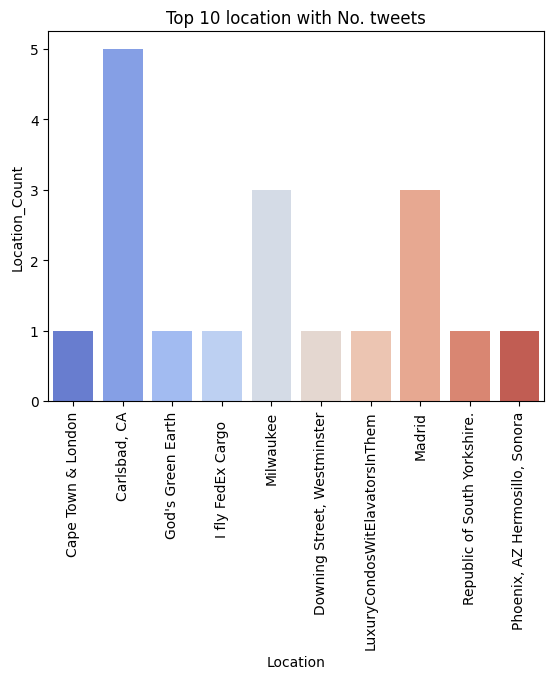

In [ ]:
sns.barplot(x="Location", y="Location_Count", data=top_loc_df,
                 palette='coolwarm')
sns.set_theme(style="darkgrid")
plt.title("Top 10 location with No. tweets")
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (5,5)

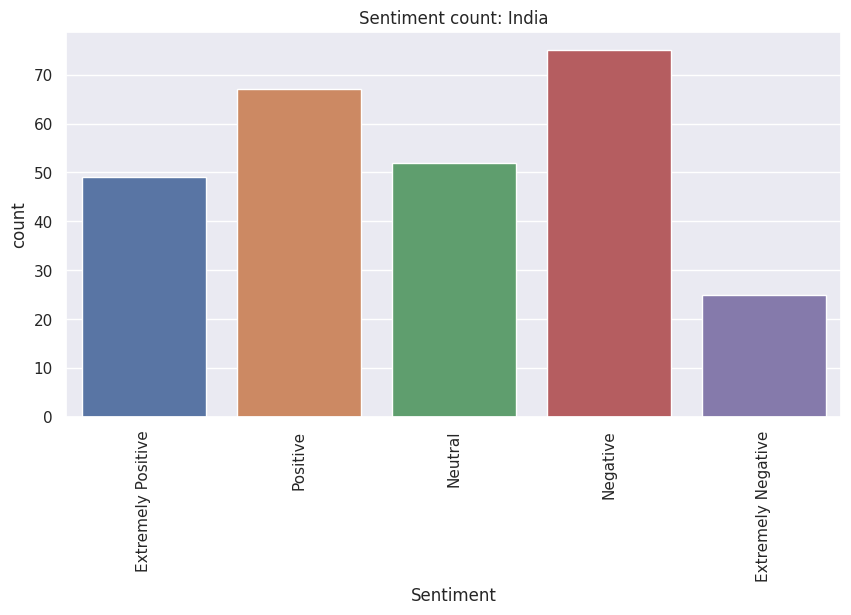

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['Location'] == 'India'], x='Sentiment')
plt.title('Sentiment count: India')
plt.xticks(rotation=90)
plt.show()

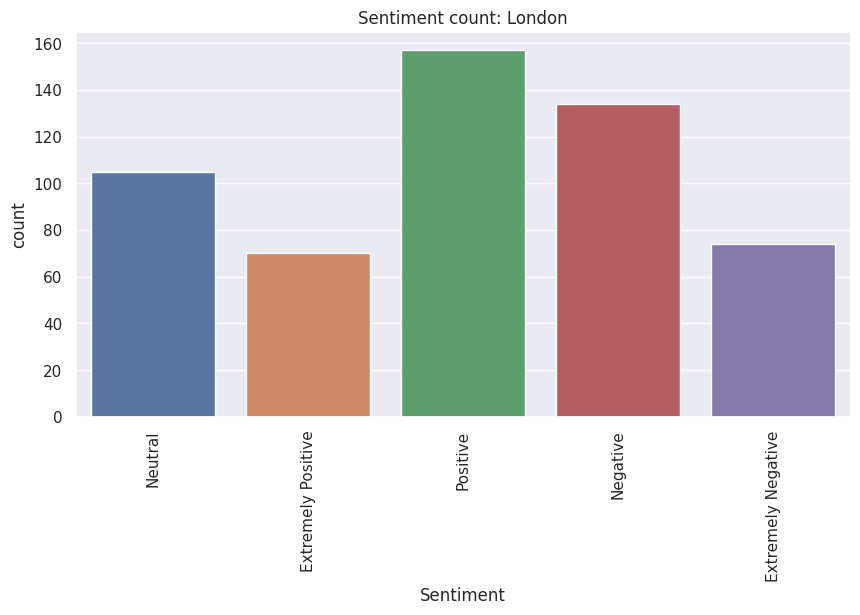

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Location']=="London"], x = 'Sentiment')
plt.title('Sentiment count: London')
plt.xticks(rotation=90)
plt.show()

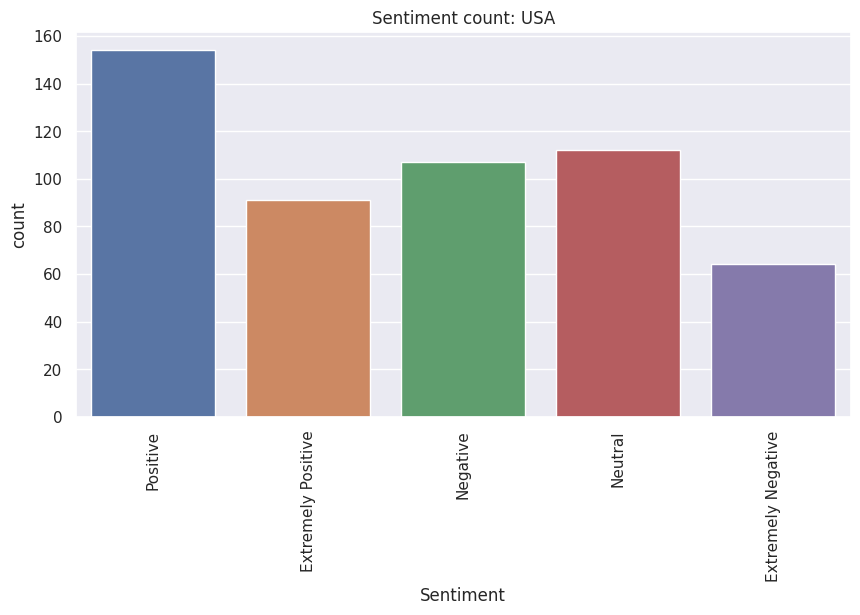

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Location']=="United States"], x = 'Sentiment')
plt.title('Sentiment count: USA')
plt.xticks(rotation=90)
plt.show()

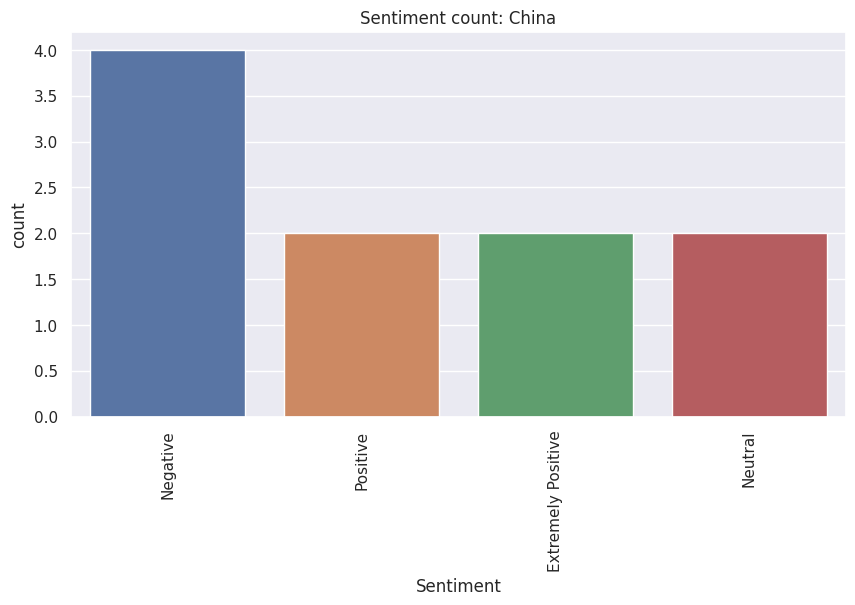

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Location']=="China"], x = 'Sentiment')
plt.title('Sentiment count: China')
plt.xticks(rotation=90)
plt.show()

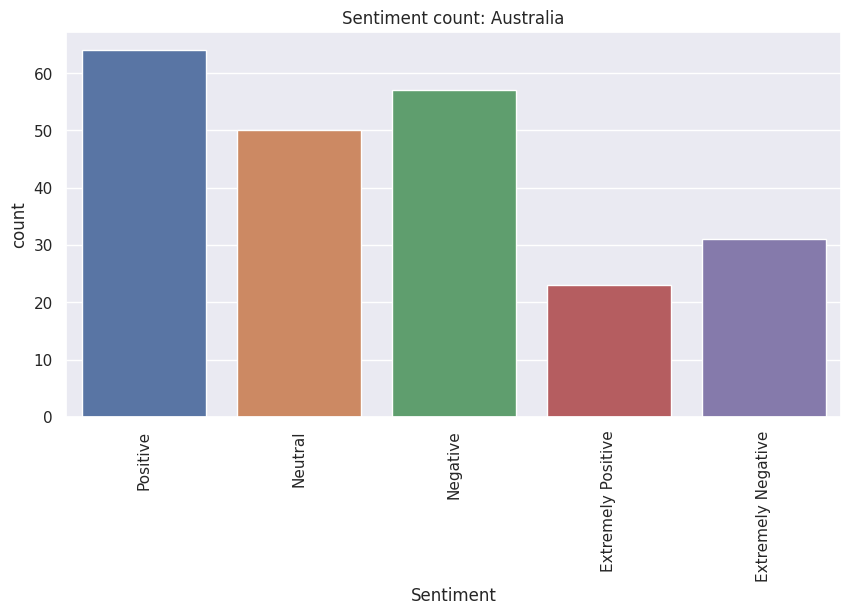

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Location']=="Australia"], x = 'Sentiment')
plt.title('Sentiment count: Australia')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'Sentiment_cat'],
      dtype='object')

In [ ]:
df.loc[4117]

UserName                                                      7916
ScreenName                                                   52868
Location                                                   Calgary
TweetAt                                                 2020-03-18
OriginalTweet    #WestJet is lying. They are NOT lowering price...
Sentiment                                                 Negative
Sentiment_cat                                                    1
Name: 4117, dtype: object

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_cat
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,3
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,3
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,1


# Data Processing

## Removing User

In [ ]:
df['OriginalTweet'].iloc[4117]

'#WestJet is lying. They are NOT lowering prices to get you out of the country.\r\r\n\r\r\nThese are screen shots for the same flight 2am 12pm 7pm\r\r\n #covid_19 #canada  @GlobalNational @globalnews @GlobalCalgary @CTVNews @CNN @JustinTrudeau https://t.co/pfEQVZVRf6'

In [ ]:
def rem_user(tweet):
  a=[]
  for word in tweet.lower().split():
    if word.startswith('@'):
      continue
    else:
      a.append(word)
  return ' '.join(a)

In [ ]:
df['Tweets'] =df['OriginalTweet'].apply(rem_user)

In [ ]:
df['Tweets'].iloc[4117]

'#westjet is lying. they are not lowering prices to get you out of the country. these are screen shots for the same flight 2am 12pm 7pm #covid_19 #canada https://t.co/pfeqvzvrf6'

## Removing Links

In [ ]:
import re
def rm_dig(tweet):
  a=[]
  for word in tweet.split():
    output = re.sub('[â£/0-9]+', '', word)
    a.append(output)
  return ' '.join(a)

In [ ]:
df['Tweets'] =df['Tweets'].apply(rm_dig)

In [ ]:
df['Tweets'].iloc[4117]

'#westjet is lying. they are not lowering prices to get you out of the country. these are screen shots for the same flight am pm pm #covid_ #canada https:t.copfeqvzvrf'

## Removing Grammar

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df['Tweets'] = df['Tweets'].apply(text_process)

In [ ]:
df['Tweets'].iloc[4117]

'westjet lying lowering prices get country screen shots flight pm pm covid canada httpstcopfeqvzvrf'

# Stemming

In [ ]:
stemmer = PorterStemmer()

In [ ]:
def stem_words(text):
     return " ".join([stemmer.stem(word) for word in text.split()])

df['Tweets']=df['Tweets'].apply(stem_words)

In [ ]:
df['Tweets'].iloc[4117]

'westjet lie lower price get countri screen shot flight pm pm covid canada httpstcopfeqvzvrf'

# Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [ ]:
df['Tweets']=df['Tweets'].apply(lemmatize_words)

In [ ]:
df['Tweets'].iloc[4117]

'westjet lie low price get countri screen shot flight pm pm covid canada httpstcopfeqvzvrf'

In [ ]:
df['OriginalTweet'].iloc[4117]

'#WestJet is lying. They are NOT lowering prices to get you out of the country.\r\r\n\r\r\nThese are screen shots for the same flight 2am 12pm 7pm\r\r\n #covid_19 #canada  @GlobalNational @globalnews @GlobalCalgary @CTVNews @CNN @JustinTrudeau https://t.co/pfEQVZVRf6'

# Analyzing Hashtag

In [ ]:
def get_tags(tweet):
  stri = ''
  for word in tweet.lower().split():
    if word.startswith("#"):
      stri+=word[1:]+','
  return stri[:-1]

In [ ]:
df['hashtags'] = df['OriginalTweet'].apply(get_tags)

In [ ]:
df["OriginalTweet"].iloc[25]

"UK #consumer poll indicates the majority expect #covid19's impact to last 4-12 months (at 12 March). We expect this to increase at the next #tracker... See full results of the @RetailX Coronavirus Consumer Confidence Tracker here: https://t.co/K3uJlcjqDB https://t.co/9G3kgqIXJ8"

In [ ]:
df['Tweets'].iloc[25]

'uk consum poll indic major expect covid impact last month march expect increas next tracker see full result coronaviru consum confid tracker httpstcokujlcjqdb httpstcogkgqixj'

In [ ]:
df['Tweets'].iloc[25]

'uk consum poll indic major expect covid impact last month march expect increas next tracker see full result coronaviru consum confid tracker httpstcokujlcjqdb httpstcogkgqixj'

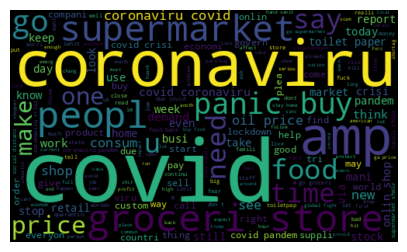

In [ ]:
all_Words = ' '.join([twts for twts in df['Tweets'][df['Sentiment_cat']==1]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_Words)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

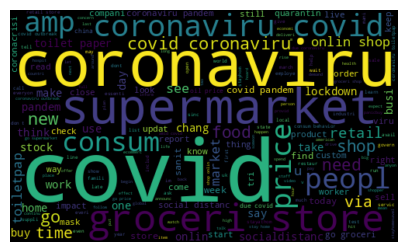

In [ ]:
all_Words = ' '.join([twts for twts in df['Tweets'][df['Sentiment_cat']==2]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_Words)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

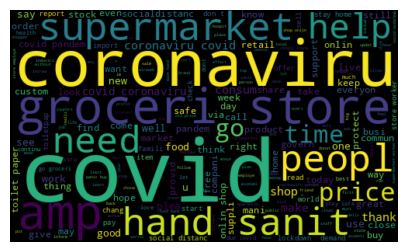

In [ ]:
all_Words = ' '.join([twts for twts in df['Tweets'][df['Sentiment_cat']==3]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_Words)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.loc[2235]

UserName                                                      6034
ScreenName                                                   50986
Location                                       Birmingham, England
TweetAt                                                 2020-03-17
OriginalTweet    Finally, an online shopping substitution that ...
Sentiment                                                 Positive
Sentiment_cat                                                    3
Tweets           final onlin shop substitut make sen andrex cla...
hashtags         covid19,coronavirus,dontbuythesun,workingfromhome
Name: 2235, dtype: object

In [ ]:
df['hashtags'].value_counts()

                                                          17541
coronavirus                                                2991
covid_19                                                    668
covid2019                                                   391
coronavirus,covid19                                         308
                                                          ...  
coronavirus,gopinsidertrading,trumplies                       1
lesson,toiletpaper,coronavirus,virus,toilet,meme,memes        1
covid_19,silverlinings                                        1
traderjoes.,coronavirus:                                      1
coronavirus,covid19,coronavirus                               1
Name: hashtags, Length: 15660, dtype: int64

# Multiclass Classification

In [ ]:
train,test = train_test_split(df,test_size = 0.2,random_state=0,stratify = df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.

In [ ]:
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (32925, 9)
test shape :  (8232, 9)


# Counter Vectorizer For Multi Class Classification

In [ ]:
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

In [ ]:
X_train = vectorizer.fit_transform(train.Tweets.values)
X_test = vectorizer.transform(test.Tweets.values)

In [ ]:
y_train = train.Sentiment.values
y_test = test.Sentiment.values

In [ ]:
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (32925, 52044)
X_test.shape :  (8232, 52044)
y_train.shape :  (32925,)
y_test.shape :  (8232,)


In [ ]:
X_train.toarray()[1]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_train

array(['Neutral', 'Neutral', 'Extremely Negative', ..., 'Neutral',
       'Positive', 'Neutral'], dtype=object)

In [ ]:
y_test

array(['Negative', 'Positive', 'Negative', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

# Naive Bayes Classification

In [ ]:
naiveByes_clf = MultinomialNB()

In [ ]:
naiveByes_clf.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred = naiveByes_clf.predict(X_test)

In [ ]:
train_accuracy = naiveByes_clf.score(X_train,y_train)
print("training accuracy Score    : ",train_accuracy)

training accuracy Score    :  0.73375854214123


In [ ]:
NB_accuracy = accuracy_score(y_test,y_pred)
print("test accuracy Score : ",NB_accuracy )

test accuracy Score :  0.45310981535471334


In [ ]:
print(classification_report(y_pred,y_test))

                    precision    recall  f1-score   support

Extremely Negative       0.26      0.64      0.37       447
Extremely Positive       0.31      0.63      0.42       656
          Negative       0.55      0.42      0.48      2583
           Neutral       0.23      0.73      0.35       483
          Positive       0.70      0.39      0.50      4063

          accuracy                           0.45      8232
         macro avg       0.41      0.56      0.42      8232
      weighted avg       0.57      0.45      0.47      8232



# Stochastic Gradient Descent-SGD Classification

In [ ]:
sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

In [ ]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=0)

In [ ]:
sgd_prediction = sgd_clf.predict(X_test)

In [ ]:
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))

Training accuracy Score    :  0.890782080485953


In [ ]:
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Validation accuracy Score : ",sgd_accuracy )

Validation accuracy Score :  0.5674198250728864


In [ ]:
print(classification_report(sgd_prediction,y_test))

                    precision    recall  f1-score   support

Extremely Negative       0.68      0.61      0.64      1217
Extremely Positive       0.70      0.64      0.67      1464
          Negative       0.43      0.50      0.47      1698
           Neutral       0.74      0.58      0.65      1957
          Positive       0.44      0.53      0.48      1896

          accuracy                           0.57      8232
         macro avg       0.60      0.57      0.58      8232
      weighted avg       0.59      0.57      0.57      8232



# Random Forest Classification

In [ ]:
rf_clf = RandomForestClassifier()

In [ ]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf_prediction = rf_clf.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_test,rf_prediction)

In [ ]:
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )

Training accuracy Score    :  0.9998481397114655
Validation accuracy Score :  0.5569727891156463


In [ ]:
print(classification_report(rf_prediction,y_test))

                    precision    recall  f1-score   support

Extremely Negative       0.38      0.69      0.49       613
Extremely Positive       0.32      0.72      0.44       590
          Negative       0.53      0.52      0.52      2035
           Neutral       0.77      0.62      0.68      1914
          Positive       0.66      0.49      0.56      3080

          accuracy                           0.56      8232
         macro avg       0.53      0.61      0.54      8232
      weighted avg       0.61      0.56      0.57      8232



# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

SVC()

In [ ]:
svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)

In [ ]:
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )

Training accuracy Score    :  0.9109794988610478
Validation accuracy Score :  0.6055636540330418


In [ ]:
print(classification_report(svc_prediction,y_test))

                    precision    recall  f1-score   support

Extremely Negative       0.49      0.73      0.59       744
Extremely Positive       0.54      0.77      0.63       926
          Negative       0.56      0.55      0.56      2029
           Neutral       0.71      0.63      0.67      1744
          Positive       0.66      0.54      0.60      2789

          accuracy                           0.61      8232
         macro avg       0.59      0.64      0.61      8232
      weighted avg       0.62      0.61      0.61      8232



# Logistic Regression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)

In [ ]:
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )

Training accuracy Score    :  0.934791192103265
Validation accuracy Score :  0.6141885325558795


In [ ]:
print(classification_report(logreg_prediction,y_test))

                    precision    recall  f1-score   support

Extremely Negative       0.62      0.68      0.65       994
Extremely Positive       0.62      0.72      0.66      1141
          Negative       0.55      0.56      0.56      1943
           Neutral       0.70      0.64      0.67      1698
          Positive       0.61      0.56      0.58      2456

          accuracy                           0.61      8232
         macro avg       0.62      0.63      0.62      8232
      weighted avg       0.62      0.61      0.61      8232



# CATBOOST MODEL

In [ ]:
clf2 = CatBoostClassifier()

In [ ]:
clf2.fit(X_train, y_train,eval_set=(X_test, y_test),verbose=False)

In [ ]:
print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')

CatBoost model is fitted: True
CatBoost model parameters:


In [ ]:
print(clf2.get_params())

{}


In [ ]:
catboost_prediction = clf2.predict(X_test)
catboost_accuracy = accuracy_score(y_test,catboost_prediction)

In [ ]:
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )

Training accuracy Score    :  0.6629612756264237
Validation accuracy Score :  0.6180758017492711


In [ ]:
print(classification_report(catboost_prediction,y_test))

                    precision    recall  f1-score   support

Extremely Negative       0.54      0.70      0.61       843
Extremely Positive       0.56      0.75      0.64       987
          Negative       0.53      0.58      0.55      1817
           Neutral       0.80      0.61      0.69      2040
          Positive       0.64      0.58      0.61      2545

          accuracy                           0.62      8232
         macro avg       0.61      0.64      0.62      8232
      weighted avg       0.64      0.62      0.62      8232



# Result

In [ ]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Stochastic Gradient Decent','CatBoost'],
                       'Test accuracy': [svc_accuracy, logreg_accuracy, rf_accuracy, NB_accuracy, sgd_accuracy,catboost_accuracy]})

In [ ]:
models.reset_index(inplace=True)

In [ ]:
models.sort_values(by='Test accuracy', ascending=False)

,index,Model,Test accuracy
5,5,CatBoost,0.618076
1,1,Logistic Regression,0.614189
0,0,Support Vector Machines,0.605564
4,4,Stochastic Gradient Decent,0.567420
2,2,Random Forest,0.556973
3,3,Naive Bayes,0.453110


# MultiClass --> Binary

In [ ]:
new_df = df[['Tweets','Sentiment']]

In [ ]:
new_df

,Tweets,Sentiment
0,httpstcoifzfanpa httpstcoxxghgfzcc httpstcoinl...,Neutral
1,advic talk neighbour famili exchang phone numb...,Positive
2,coronaviru australia woolworth give elderli di...,Positive
3,food stock one empti plea dont panic enough fo...,Positive
4,readi go supermarket covid outbreak im paranoi...,Extremely Negative
...,...,...
41152,airlin pilot offer stock supermarket shelv nz ...,Neutral
41153,respons complaint provid cite covid relat dela...,Extremely Negative
41154,know it get tough ration toilet paper coronav...,Positive
41155,wrong smell hand sanit start turn coronaviru c...,Neutral


In [ ]:
new_df=new_df[new_df['Sentiment']!="Neutral"]

In [ ]:
new_df['Sentiment'] = new_df['Sentiment'].replace({'Positive':1,'Extremely Positive':1,'Negative':0,'Extremely Negative':0})

In [ ]:
new_df

,Tweets,Sentiment
1,advic talk neighbour famili exchang phone numb...,1
2,coronaviru australia woolworth give elderli di...,1
3,food stock one empti plea dont panic enough fo...,1
4,readi go supermarket covid outbreak im paranoi...,0
5,news region first confirm covid case come sul...,1
...,...,...
41150,never wed situat amp world go supermarket pic...,1
41151,definit man feel like fall need honor hero cov...,1
41153,respons complaint provid cite covid relat dela...,0
41154,know it get tough ration toilet paper coronav...,1


# Model Training

In [ ]:
train,test = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) #stratification means th

In [ ]:
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (26755, 2)
test shape :  (6689, 2)


In [ ]:
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

In [ ]:
X_train = vectorizer.fit_transform(train.Tweets.values)
X_test = vectorizer.transform(test.Tweets.values)

In [ ]:
y_train = train.Sentiment.values
y_test = test.Sentiment.values

In [ ]:
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (26755, 43638)
X_test.shape :  (6689, 43638)
y_train.shape :  (26755,)
y_test.shape :  (6689,)


# Naive Bayes Classification For Binary

In [ ]:
naiveByes_clf = MultinomialNB()

In [ ]:
naiveByes_clf.fit(X_train,y_train)

MultinomialNB()

In [ ]:
NB_prediction = naiveByes_clf.predict(X_test)

In [ ]:
NB_accuracy = accuracy_score(y_test,NB_prediction)

In [ ]:
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )

training accuracy Score    :  0.8945243879648663
Validation accuracy Score :  0.8050530722081028


In [ ]:
print(classification_report(NB_prediction,y_test))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      2972
           1       0.83      0.81      0.82      3717

    accuracy                           0.81      6689
   macro avg       0.80      0.80      0.80      6689
weighted avg       0.81      0.81      0.81      6689



# Random Forest Classification for Binary

In [ ]:
rf_clf = RandomForestClassifier()

In [ ]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)

In [ ]:
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )

Training accuracy Score    :  0.9999626238086339
Validation accuracy Score :  0.83570040364778


In [ ]:
print(classification_report(rf_prediction,y_test))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      2901
           1       0.87      0.83      0.85      3788

    accuracy                           0.84      6689
   macro avg       0.83      0.84      0.83      6689
weighted avg       0.84      0.84      0.84      6689



# Logistic Regression for Binary

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)

In [ ]:
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )

Training accuracy Score    :  0.9668099420669034
Validation accuracy Score :  0.8751681865749739


In [ ]:
print(classification_report(logreg_prediction,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3017
           1       0.89      0.88      0.89      3672

    accuracy                           0.88      6689
   macro avg       0.87      0.87      0.87      6689
weighted avg       0.88      0.88      0.88      6689



# CATBOOST MODEL for BINARY

In [ ]:
clf2 = CatBoostClassifier()

In [ ]:
clf2.fit(X_train, y_train,  eval_set=(X_test, y_test), verbose=False)

In [ ]:
print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')

CatBoost model is fitted: True
CatBoost model parameters:


In [ ]:
print(clf2.get_params())

{}


In [ ]:
catboost_prediction = clf2.predict(X_test)
catboost_accuracy = accuracy_score(y_test,catboost_prediction)

In [ ]:
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )

Training accuracy Score    :  0.909362735937208
Validation accuracy Score :  0.8721782030198834


In [ ]:
print(classification_report(catboost_prediction,y_test))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2945
           1       0.90      0.87      0.88      3744

    accuracy                           0.87      6689
   macro avg       0.87      0.87      0.87      6689
weighted avg       0.87      0.87      0.87      6689



# Support Vector Machine for Binary

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

SVC()

In [ ]:
svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)

In [ ]:
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )

Training accuracy Score    :  0.9739114184264623
Validation accuracy Score :  0.8599192704440125


In [ ]:
print(classification_report(svc_prediction,y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3011
           1       0.88      0.86      0.87      3678

    accuracy                           0.86      6689
   macro avg       0.86      0.86      0.86      6689
weighted avg       0.86      0.86      0.86      6689



# Stochastic Gradient Descent-SGD Classifier for Binary

In [ ]:
sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

In [ ]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=0)

In [ ]:
sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)

In [ ]:
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )

Training accuracy Score    :  0.9678938516165203
Validation accuracy Score :  0.8736731947974287


In [ ]:
print(classification_report(sgd_prediction,y_test))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2965
           1       0.90      0.87      0.88      3724

    accuracy                           0.87      6689
   macro avg       0.87      0.87      0.87      6689
weighted avg       0.87      0.87      0.87      6689



In [ ]:
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_test)

In [ ]:
labels = ['Negative', 'Positive']

In [ ]:
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

[[11843   475]
 [  384 14053]]


<Axes: >

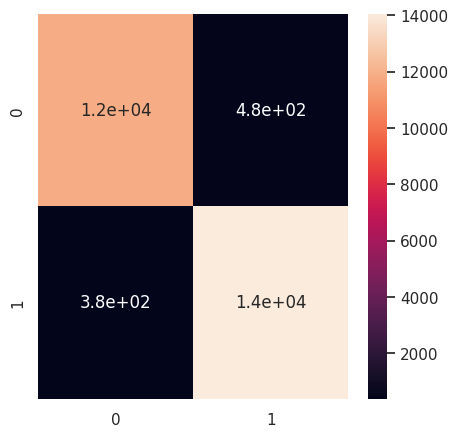

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

In [ ]:
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

# Result for Binary

In [ ]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Stochastic Gradient Decent', 'CatBoost'],
                       'Test accuracy': [svc_accuracy, logreg_accuracy, rf_accuracy, NB_accuracy, sgd_accuracy, catboost_accuracy]})

In [ ]:
models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,Logistic Regression,0.875168
4,Stochastic Gradient Decent,0.873673
5,CatBoost,0.872178
0,Support Vector Machines,0.859919
2,Random Forest,0.835700
3,Naive Bayes,0.805053


# **Conclusion**

*   **For multiclass classification, the best model for this dataset would beCatBoost which gives highest accuracy 62%.**
*   **For binary classification, the best model for this dataset would be Logistic Regression which gives highest accuracy 87%.**

In [ ]:
print( "The End" )

The End
